# Imports

In [10]:
from torch.utils.data import DataLoader, random_split
import torch
from data import PermutationDataset
from model import PermutationModel
from train import train_one_epoch, evaluate_model
import matplotlib.pyplot as plt

# Parameters
This includes parameters for what to train on and predict, and also the hyperparameters for training.

In [11]:
n = 6
label_name = "stat4"
epochs = 1000
train_split, test_split = 0.8, 0.2
learning_rate = 0.001
momentum = 0.9
batch_size = 64

# Initialization
Initialize the data loaders, model, loss function, optimizers.

In [12]:

layers = [2]
full_dataset = PermutationDataset(n, label_name)
training_dataset, test_dataset = random_split(full_dataset, [train_split, test_split])
model = PermutationModel(n, layers)
loss_fn = torch.nn.CrossEntropyLoss(full_dataset.class_weights())
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=momentum)
training_loader = DataLoader(training_dataset, batch_size=batch_size, shuffle=True)
losses = []

# Training loop
Train the model for the appropriate number of epochs and then save the model in `models`.

In [13]:
import os

directory = "models"
if not os.path.exists(directory):
    os.makedirs(directory)


for epoch in range(epochs):
    model.train(True)
    current_loss = train_one_epoch(training_loader, model, loss_fn, optimizer)
    print(f"Epoch {epoch}, Loss {current_loss}")
    losses.append(current_loss)

torch.save(model.state_dict(), f"models/{label_name}_{n}.pt")


Epoch 0, Loss 6.331277787685394
Epoch 1, Loss 6.297167420387268
Epoch 2, Loss 6.257067918777466
Epoch 3, Loss 6.208547651767731
Epoch 4, Loss 6.160779893398285
Epoch 5, Loss 6.112097978591919
Epoch 6, Loss 6.062546193599701
Epoch 7, Loss 6.013045251369476
Epoch 8, Loss 5.967534780502319
Epoch 9, Loss 5.920954525470734
Epoch 10, Loss 5.876288950443268
Epoch 11, Loss 5.831496298313141
Epoch 12, Loss 5.785176634788513
Epoch 13, Loss 5.743500590324402
Epoch 14, Loss 5.7009642124176025
Epoch 15, Loss 5.66003030538559
Epoch 16, Loss 5.6189393401145935
Epoch 17, Loss 5.577647924423218
Epoch 18, Loss 5.53975909948349
Epoch 19, Loss 5.501339554786682
Epoch 20, Loss 5.461870908737183
Epoch 21, Loss 5.424415588378906
Epoch 22, Loss 5.386537313461304
Epoch 23, Loss 5.353057324886322
Epoch 24, Loss 5.313956320285797
Epoch 25, Loss 5.280331254005432
Epoch 26, Loss 5.243313670158386
Epoch 27, Loss 5.210856318473816
Epoch 28, Loss 5.176736414432526
Epoch 29, Loss 5.142241954803467
Epoch 30, Loss 5.111

# Print the loss curve
Visualize the loss curve to ensure that the model is learning correctly. Save the loss curve in `figures/` so that you can refer to them later.

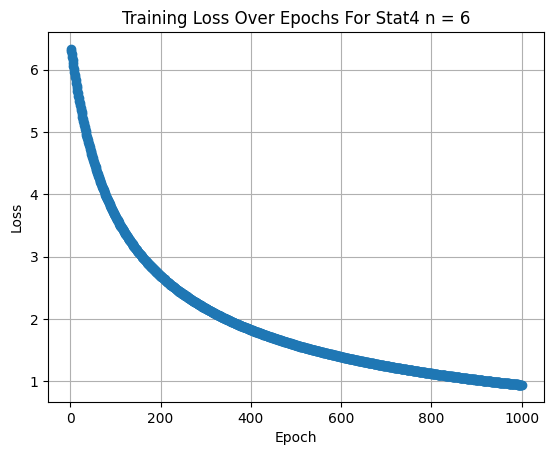

In [14]:
# Plot the training losses
plt.figure()
plt.plot(range(1, epochs + 1), losses, marker='o')
plt.title('Training Loss Over Epochs For Stat4 n = 6')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)

# Ensure the "figures" directory exists
figures_directory = "figures"
if not os.path.exists(figures_directory):
    os.makedirs(figures_directory)

# Save the plot
plt.savefig(os.path.join(figures_directory, 'training_loss_curve_stat4_n=5.png'))
plt.show()
plt.close()  # Explicitly close the plot to ensure it is written to the file





# Evaluate the model
Compute the confusion matrix on the train and test dataset and print out the accuracy and plot the confusion matrix.

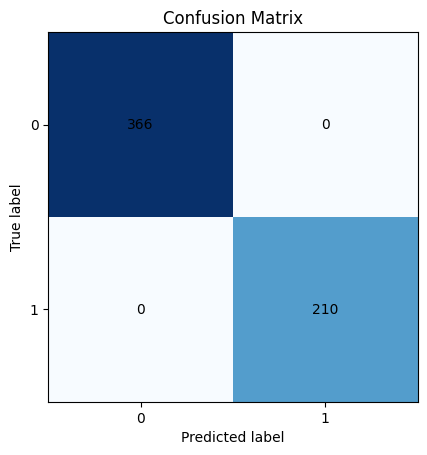

Accuracy for class 0 = 100.0%
Accuracy for class 1 = 100.0%
Overall accuracy = 100.0%


In [15]:
# TOD0
confusion_matrix = evaluate_model(model, training_dataset)
confusion_matrix.plot()
confusion_matrix.print_accuracy()

# Plot model weights and connections.
Plot the model weights and connections in order to attempt to interpret what the model is learning.

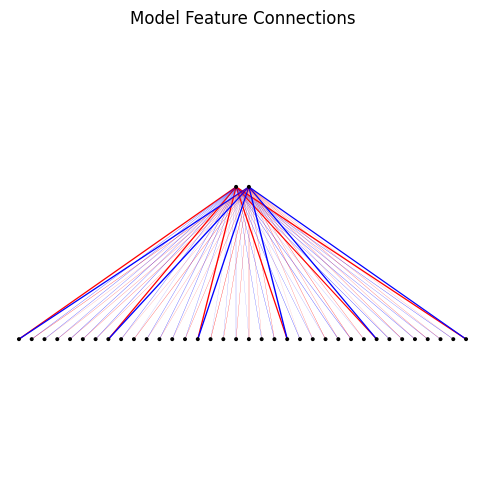

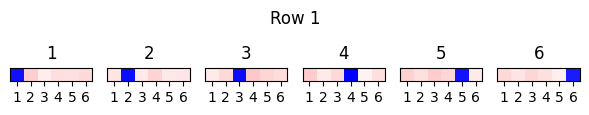

In [16]:



model.plot_connections()


model.plot_heatmap_feature(0, 1)


